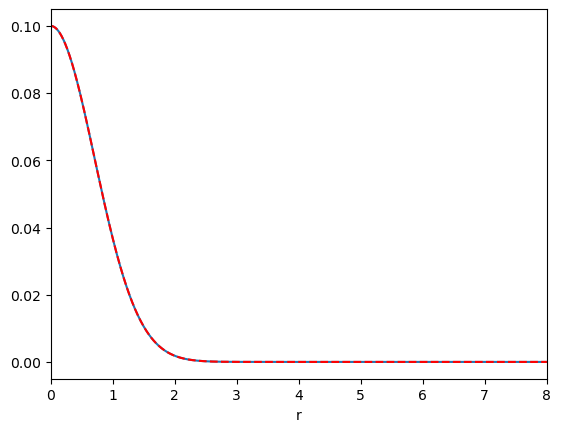

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 400                                                   # Truncation ordem

L0 = 2                                               # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 2

A0 = 0.1      # 0.08-> disperses ;  -> colapses         

sigma = 1

Phi_0 = A0*np.exp((-r**2)/(sigma**2))           # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*np.exp((-rplot**2)/(sigma**2))       


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phi_plot0, rplot, Phiplot, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


In [2]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-40    # tolerance

# Newton Raphson loop
for i in range(N_int):
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


0.001000285403972805 3.2255017002146945e-07 1.948459080787845e-08 6.9723650873510346e-09 1.1230352034687856e-09 2.129545808019949e-10 4.006715472328248e-11 7.545014412680002e-12 1.4208096440154443e-12 2.6755569175002264e-13 5.038401907415955e-14 9.487930062652336e-15 1.7866938885764724e-15 3.3645642959767566e-16 6.33588822451563e-17 1.1931256670188275e-17 2.2468021648033596e-18 4.2310077003672197e-19 7.967516642340743e-20 1.5003741883881244e-20 2.8253646334544605e-21 5.322911316613161e-22 9.985696667414884e-23 1.8858340415002912e-23 3.4688003220375174e-24 7.895834095581499e-25 1.9017992401124892e-25 

In [3]:
# Equation for Krr: momentum constraint
# Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [4]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
qrSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
qrrSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  



In [ ]:
# Runge Kutta 4th order

h = 0.001   # step size
tf = 15

It = int(tf/h)



t = 0


Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

t1 = np.linspace(0, tf, len(Alpha_origin))

V = 0

while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**(1/2))    # L2 error of HC 
  
  # Alpha origin
  Alpha_origin.append(1 + np.dot(al0, psi_0))
#  print(Alpha_origin)
  
  # Phi origin:  
  phi_origin.append(np.dot(a0, psi_0))
#  print(phi_origin)
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  print(t)
    
 # if t > 9:
 #   h = 0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))


t1 = np.linspace(0, tf, len(Alpha_origin))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011000000000000003
0.012000000000000004
0.013000000000000005
0.014000000000000005
0.015000000000000006
0.016000000000000007
0.017000000000000008
0.01800000000000001
0.01900000000000001
0.02000000000000001
0.02100000000000001
0.022000000000000013
0.023000000000000013
0.024000000000000014
0.025000000000000015
0.026000000000000016
0.027000000000000017
0.028000000000000018
0.02900000000000002
0.03000000000000002
0.03100000000000002
0.03200000000000002
0.03300000000000002
0.03400000000000002
0.035000000000000024
0.036000000000000025
0.037000000000000026
0.03800000000000003
0.03900000000000003
0.04000000000000003
0.04100000000000003
0.04200000000000003
0.04300000000000003
0.04400000000000003
0.04500000000000003
0.046000000000000034
0.047000000000000035
0.048000000000000036
0.04900000000000004
0.05000000000000004
0.05100000000000004
0.05200000000000004
0.05300000000000004
0.05400000000000004
0.05500000

0.4260000000000003
0.4270000000000003
0.4280000000000003
0.4290000000000003
0.4300000000000003
0.4310000000000003
0.43200000000000033
0.43300000000000033
0.43400000000000033
0.43500000000000033
0.43600000000000033
0.43700000000000033
0.43800000000000033
0.43900000000000033
0.44000000000000034
0.44100000000000034
0.44200000000000034
0.44300000000000034
0.44400000000000034
0.44500000000000034
0.44600000000000034
0.44700000000000034
0.44800000000000034
0.44900000000000034
0.45000000000000034
0.45100000000000035
0.45200000000000035
0.45300000000000035
0.45400000000000035
0.45500000000000035
0.45600000000000035
0.45700000000000035
0.45800000000000035
0.45900000000000035
0.46000000000000035
0.46100000000000035
0.46200000000000035
0.46300000000000036
0.46400000000000036
0.46500000000000036
0.46600000000000036
0.46700000000000036
0.46800000000000036
0.46900000000000036
0.47000000000000036
0.47100000000000036
0.47200000000000036
0.47300000000000036
0.47400000000000037
0.47500000000000037
0.4760

0.8580000000000007
0.8590000000000007
0.8600000000000007
0.8610000000000007
0.8620000000000007
0.8630000000000007
0.8640000000000007
0.8650000000000007
0.8660000000000007
0.8670000000000007
0.8680000000000007
0.8690000000000007
0.8700000000000007
0.8710000000000007
0.8720000000000007
0.8730000000000007
0.8740000000000007
0.8750000000000007
0.8760000000000007
0.8770000000000007
0.8780000000000007
0.8790000000000007
0.8800000000000007
0.8810000000000007
0.8820000000000007
0.8830000000000007
0.8840000000000007
0.8850000000000007
0.8860000000000007
0.8870000000000007
0.8880000000000007
0.8890000000000007
0.8900000000000007
0.8910000000000007
0.8920000000000007
0.8930000000000007
0.8940000000000007
0.8950000000000007
0.8960000000000007
0.8970000000000007
0.8980000000000007
0.8990000000000007
0.9000000000000007
0.9010000000000007
0.9020000000000007
0.9030000000000007
0.9040000000000007
0.9050000000000007
0.9060000000000007
0.9070000000000007
0.9080000000000007
0.9090000000000007
0.9100000000

1.2989999999999677
1.2999999999999676
1.3009999999999675
1.3019999999999674
1.3029999999999673
1.3039999999999672
1.304999999999967
1.305999999999967
1.3069999999999669
1.3079999999999667
1.3089999999999666
1.3099999999999665
1.3109999999999664
1.3119999999999663
1.3129999999999662
1.313999999999966
1.314999999999966
1.3159999999999659
1.3169999999999658
1.3179999999999656
1.3189999999999655
1.3199999999999654
1.3209999999999653
1.3219999999999652
1.322999999999965
1.323999999999965
1.3249999999999649
1.3259999999999648
1.3269999999999647
1.3279999999999645
1.3289999999999644
1.3299999999999643
1.3309999999999642
1.331999999999964
1.332999999999964
1.3339999999999639
1.3349999999999638
1.3359999999999637
1.3369999999999636
1.3379999999999634
1.3389999999999633
1.3399999999999632
1.340999999999963
1.341999999999963
1.342999999999963
1.3439999999999628
1.3449999999999627
1.3459999999999626
1.3469999999999624
1.3479999999999623
1.3489999999999622
1.3499999999999621
1.350999999999962
1.351

1.7379999999999194
1.7389999999999193
1.7399999999999192
1.740999999999919
1.741999999999919
1.7429999999999188
1.7439999999999187
1.7449999999999186
1.7459999999999185
1.7469999999999184
1.7479999999999183
1.7489999999999182
1.749999999999918
1.750999999999918
1.7519999999999178
1.7529999999999177
1.7539999999999176
1.7549999999999175
1.7559999999999174
1.7569999999999173
1.7579999999999172
1.758999999999917
1.759999999999917
1.7609999999999169
1.7619999999999167
1.7629999999999166
1.7639999999999165
1.7649999999999164
1.7659999999999163
1.7669999999999162
1.767999999999916
1.768999999999916
1.7699999999999159
1.7709999999999158
1.7719999999999156
1.7729999999999155
1.7739999999999154
1.7749999999999153
1.7759999999999152
1.776999999999915
1.777999999999915
1.7789999999999149
1.7799999999999148
1.7809999999999147
1.7819999999999145
1.7829999999999144
1.7839999999999143
1.7849999999999142
1.785999999999914
1.786999999999914
1.7879999999999139
1.7889999999999138
1.7899999999999137
1.790

2.180999999999871
2.1819999999998707
2.1829999999998706
2.1839999999998705
2.1849999999998704
2.1859999999998703
2.18699999999987
2.18799999999987
2.18899999999987
2.18999999999987
2.1909999999998697
2.1919999999998696
2.1929999999998695
2.1939999999998694
2.1949999999998693
2.195999999999869
2.196999999999869
2.197999999999869
2.198999999999869
2.1999999999998687
2.2009999999998686
2.2019999999998685
2.2029999999998684
2.2039999999998683
2.204999999999868
2.205999999999868
2.206999999999868
2.207999999999868
2.2089999999998677
2.2099999999998676
2.2109999999998675
2.2119999999998674
2.2129999999998673
2.213999999999867
2.214999999999867
2.215999999999867
2.216999999999867
2.2179999999998667
2.2189999999998666
2.2199999999998665
2.2209999999998664
2.2219999999998663
2.222999999999866
2.223999999999866
2.224999999999866
2.225999999999866
2.2269999999998658
2.2279999999998656
2.2289999999998655
2.2299999999998654
2.2309999999998653
2.231999999999865
2.232999999999865
2.233999999999865
2.

2.6269999999998217
2.6279999999998216
2.6289999999998215
2.6299999999998214
2.6309999999998213
2.631999999999821
2.632999999999821
2.633999999999821
2.634999999999821
2.6359999999998207
2.6369999999998206
2.6379999999998205
2.6389999999998204
2.6399999999998203
2.64099999999982
2.64199999999982
2.64299999999982
2.64399999999982
2.6449999999998197
2.6459999999998196
2.6469999999998195
2.6479999999998194
2.6489999999998193
2.649999999999819
2.650999999999819
2.651999999999819
2.652999999999819
2.6539999999998187
2.6549999999998186
2.6559999999998185
2.6569999999998184
2.6579999999998183
2.658999999999818
2.659999999999818
2.660999999999818
2.661999999999818
2.6629999999998177
2.6639999999998176
2.6649999999998175
2.6659999999998174
2.6669999999998173
2.667999999999817
2.668999999999817
2.669999999999817
2.670999999999817
2.6719999999998167
2.6729999999998166
2.6739999999998165
2.6749999999998164
2.6759999999998163
2.676999999999816
2.677999999999816
2.678999999999816
2.679999999999816
2.

3.069999999999773
3.070999999999773
3.0719999999997727
3.0729999999997726
3.0739999999997725
3.0749999999997724
3.0759999999997722
3.076999999999772
3.077999999999772
3.078999999999772
3.079999999999772
3.0809999999997717
3.0819999999997716
3.0829999999997715
3.0839999999997714
3.0849999999997713
3.085999999999771
3.086999999999771
3.087999999999771
3.088999999999771
3.0899999999997707
3.0909999999997706
3.0919999999997705
3.0929999999997704
3.0939999999997703
3.09499999999977
3.09599999999977
3.09699999999977
3.09799999999977
3.0989999999997697
3.0999999999997696
3.1009999999997695
3.1019999999997694
3.1029999999997693
3.103999999999769
3.104999999999769
3.105999999999769
3.106999999999769
3.1079999999997687
3.1089999999997686
3.1099999999997685
3.1109999999997684
3.1119999999997683
3.112999999999768
3.113999999999768
3.114999999999768
3.115999999999768
3.1169999999997677
3.1179999999997676
3.1189999999997675
3.1199999999997674
3.1209999999997673
3.121999999999767
3.122999999999767
3.

3.512999999999724
3.513999999999724
3.514999999999724
3.515999999999724
3.5169999999997237
3.5179999999997236
3.5189999999997235
3.5199999999997234
3.5209999999997232
3.521999999999723
3.522999999999723
3.523999999999723
3.524999999999723
3.5259999999997227
3.5269999999997226
3.5279999999997225
3.5289999999997224
3.5299999999997222
3.530999999999722
3.531999999999722
3.532999999999722
3.533999999999722
3.5349999999997217
3.5359999999997216
3.5369999999997215
3.5379999999997214
3.5389999999997213
3.539999999999721
3.540999999999721
3.541999999999721
3.542999999999721
3.5439999999997207
3.5449999999997206
3.5459999999997205
3.5469999999997204
3.5479999999997203
3.54899999999972
3.54999999999972
3.55099999999972
3.55199999999972
3.5529999999997197
3.5539999999997196
3.5549999999997195
3.5559999999997194
3.5569999999997193
3.557999999999719
3.558999999999719
3.559999999999719
3.560999999999719
3.5619999999997187
3.5629999999997186
3.5639999999997185
3.5649999999997184
3.5659999999997183
3.

3.956999999999675
3.957999999999675
3.958999999999675
3.959999999999675
3.960999999999675
3.9619999999996747
3.9629999999996746
3.9639999999996745
3.9649999999996743
3.9659999999996742
3.966999999999674
3.967999999999674
3.968999999999674
3.969999999999674
3.9709999999996737
3.9719999999996736
3.9729999999996735
3.9739999999996733
3.9749999999996732
3.975999999999673
3.976999999999673
3.977999999999673
3.978999999999673
3.9799999999996727
3.9809999999996726
3.9819999999996725
3.9829999999996724
3.9839999999996722
3.984999999999672
3.985999999999672
3.986999999999672
3.987999999999672
3.9889999999996717
3.9899999999996716
3.9909999999996715
3.9919999999996714
3.9929999999996713
3.993999999999671
3.994999999999671
3.995999999999671
3.996999999999671
3.9979999999996707
3.9989999999996706
3.9999999999996705
4.000999999999671
4.001999999999671
4.0029999999996715
4.003999999999672
4.004999999999672
4.0059999999996725
4.006999999999673
4.007999999999673
4.0089999999996735
4.009999999999674
4.

4.415999999999809
4.41699999999981
4.41799999999981
4.41899999999981
4.419999999999811
4.420999999999811
4.421999999999811
4.422999999999812
4.423999999999812
4.424999999999812
4.425999999999813
4.426999999999813
4.427999999999813
4.428999999999814
4.429999999999814
4.430999999999814
4.431999999999815
4.432999999999815
4.433999999999815
4.434999999999816
4.435999999999816
4.436999999999816
4.437999999999817
4.438999999999817
4.439999999999817
4.440999999999818
4.441999999999818
4.442999999999818
4.443999999999819
4.444999999999819
4.445999999999819
4.44699999999982
4.44799999999982
4.44899999999982
4.449999999999821
4.450999999999821
4.451999999999821
4.452999999999822
4.453999999999822
4.454999999999822
4.455999999999823
4.456999999999823
4.457999999999823
4.458999999999824
4.459999999999824
4.460999999999824
4.461999999999825
4.462999999999825
4.463999999999825
4.464999999999826
4.465999999999826
4.466999999999826
4.467999999999827
4.468999999999827
4.4699999999998274
4.4709999999998

4.871999999999962
4.872999999999962
4.873999999999962
4.874999999999963
4.875999999999963
4.876999999999963
4.877999999999964
4.878999999999964
4.879999999999964
4.880999999999965
4.881999999999965
4.882999999999965
4.883999999999966
4.884999999999966
4.885999999999966
4.886999999999967
4.887999999999967
4.888999999999967
4.889999999999968
4.890999999999968
4.891999999999968
4.892999999999969
4.893999999999969
4.894999999999969
4.89599999999997
4.89699999999997
4.89799999999997
4.898999999999971
4.899999999999971
4.900999999999971
4.901999999999972
4.902999999999972
4.903999999999972
4.904999999999973
4.905999999999973
4.906999999999973
4.907999999999974
4.908999999999974
4.909999999999974
4.910999999999975
4.911999999999975
4.912999999999975
4.913999999999976
4.914999999999976
4.915999999999976
4.916999999999977
4.917999999999977
4.918999999999977
4.919999999999978
4.920999999999978
4.921999999999978
4.922999999999979
4.923999999999979
4.924999999999979
4.92599999999998
4.926999999999

5.328000000000114
5.329000000000114
5.330000000000115
5.331000000000115
5.332000000000115
5.333000000000116
5.334000000000116
5.335000000000116
5.336000000000117
5.337000000000117
5.338000000000117
5.339000000000118
5.340000000000118
5.341000000000118
5.342000000000119
5.343000000000119
5.344000000000119
5.34500000000012
5.34600000000012
5.34700000000012
5.348000000000121
5.349000000000121
5.350000000000121
5.351000000000122
5.352000000000122
5.353000000000122
5.354000000000123
5.355000000000123
5.356000000000123
5.357000000000124
5.358000000000124
5.359000000000124
5.360000000000125
5.361000000000125
5.362000000000125
5.363000000000126
5.364000000000126
5.365000000000126
5.366000000000127
5.367000000000127
5.368000000000127
5.369000000000128
5.370000000000128
5.371000000000128
5.372000000000129
5.373000000000129
5.374000000000129
5.37500000000013
5.37600000000013
5.37700000000013
5.378000000000131
5.379000000000131
5.380000000000131
5.381000000000132
5.382000000000132
5.38300000000013

5.787000000000267
5.788000000000268
5.789000000000268
5.790000000000268
5.791000000000269
5.792000000000269
5.793000000000269
5.79400000000027
5.79500000000027
5.79600000000027
5.797000000000271
5.798000000000271
5.799000000000271
5.800000000000272
5.801000000000272
5.802000000000272
5.803000000000273
5.804000000000273
5.805000000000273
5.806000000000274
5.807000000000274
5.808000000000274
5.809000000000275
5.810000000000275
5.811000000000275
5.812000000000276
5.813000000000276
5.814000000000276
5.815000000000277
5.816000000000277
5.817000000000277
5.818000000000278
5.819000000000278
5.820000000000278
5.821000000000279
5.822000000000279
5.823000000000279
5.82400000000028
5.82500000000028
5.82600000000028
5.827000000000281
5.828000000000281
5.829000000000281
5.830000000000282
5.831000000000282
5.832000000000282
5.833000000000283
5.834000000000283
5.835000000000283
5.836000000000284
5.837000000000284
5.838000000000284
5.839000000000285
5.840000000000285
5.841000000000285
5.84200000000028

6.24500000000042
6.2460000000004205
6.247000000000421
6.248000000000421
6.2490000000004216
6.250000000000422
6.251000000000422
6.2520000000004226
6.253000000000423
6.254000000000423
6.2550000000004236
6.256000000000424
6.257000000000424
6.258000000000425
6.259000000000425
6.260000000000425
6.261000000000426
6.262000000000426
6.263000000000426
6.264000000000427
6.265000000000427
6.266000000000427
6.267000000000428
6.268000000000428
6.269000000000428
6.270000000000429
6.271000000000429
6.272000000000429
6.27300000000043
6.27400000000043
6.27500000000043
6.276000000000431
6.277000000000431
6.278000000000431
6.279000000000432
6.280000000000432
6.281000000000432
6.282000000000433
6.283000000000433
6.284000000000433
6.285000000000434
6.286000000000434
6.287000000000434
6.288000000000435
6.289000000000435
6.290000000000435
6.291000000000436
6.292000000000436
6.293000000000436
6.294000000000437
6.295000000000437
6.296000000000437
6.297000000000438
6.298000000000438
6.299000000000438
6.30000000

6.703000000000573
6.7040000000005735
6.705000000000574
6.706000000000574
6.7070000000005745
6.708000000000575
6.709000000000575
6.7100000000005755
6.711000000000576
6.712000000000576
6.7130000000005765
6.714000000000577
6.715000000000577
6.7160000000005775
6.717000000000578
6.718000000000578
6.7190000000005785
6.720000000000579
6.721000000000579
6.7220000000005795
6.72300000000058
6.72400000000058
6.7250000000005805
6.726000000000581
6.727000000000581
6.7280000000005815
6.729000000000582
6.730000000000582
6.7310000000005825
6.732000000000583
6.733000000000583
6.7340000000005835
6.735000000000584
6.736000000000584
6.7370000000005845
6.738000000000585
6.739000000000585
6.7400000000005855
6.741000000000586
6.742000000000586
6.7430000000005865
6.744000000000587
6.745000000000587
6.7460000000005875
6.747000000000588
6.748000000000588
6.7490000000005885
6.750000000000589
6.751000000000589
6.7520000000005895
6.75300000000059
6.75400000000059
6.7550000000005905
6.756000000000591
6.757000000000

7.1620000000007265
7.163000000000727
7.164000000000727
7.1650000000007275
7.166000000000728
7.167000000000728
7.1680000000007285
7.169000000000729
7.170000000000729
7.1710000000007295
7.17200000000073
7.17300000000073
7.1740000000007305
7.175000000000731
7.176000000000731
7.1770000000007315
7.178000000000732
7.179000000000732
7.1800000000007325
7.181000000000733
7.182000000000733
7.1830000000007335
7.184000000000734
7.185000000000734
7.1860000000007345
7.187000000000735
7.188000000000735
7.1890000000007355
7.190000000000736
7.191000000000736
7.1920000000007365
7.193000000000737
7.194000000000737
7.1950000000007375
7.196000000000738
7.197000000000738
7.1980000000007385
7.199000000000739
7.200000000000739
7.2010000000007395
7.20200000000074
7.20300000000074
7.2040000000007405
7.205000000000741
7.206000000000741
7.2070000000007415
7.208000000000742
7.209000000000742
7.2100000000007425
7.211000000000743
7.212000000000743
7.2130000000007435
7.214000000000744
7.215000000000744
7.216000000000

7.617000000000878
7.618000000000879
7.619000000000879
7.620000000000879
7.62100000000088
7.62200000000088
7.62300000000088
7.624000000000881
7.625000000000881
7.626000000000881
7.627000000000882
7.628000000000882
7.629000000000882
7.630000000000883
7.631000000000883
7.632000000000883
7.633000000000884
7.634000000000884
7.635000000000884
7.636000000000885
7.637000000000885
7.638000000000885
7.639000000000886
7.640000000000886
7.641000000000886
7.642000000000887
7.643000000000887
7.644000000000887
7.645000000000888
7.646000000000888
7.647000000000888
7.648000000000889
7.649000000000889
7.650000000000889
7.65100000000089
7.65200000000089
7.65300000000089
7.654000000000891
7.655000000000891
7.656000000000891
7.657000000000892
7.658000000000892
7.659000000000892
7.660000000000893
7.661000000000893
7.662000000000893
7.663000000000894
7.664000000000894
7.665000000000894
7.666000000000895
7.667000000000895
7.668000000000895
7.669000000000896
7.670000000000896
7.671000000000896
7.67200000000089

8.073000000000965
8.074000000000964
8.075000000000964
8.076000000000963
8.077000000000963
8.078000000000962
8.079000000000962
8.080000000000961
8.08100000000096
8.08200000000096
8.08300000000096
8.084000000000959
8.085000000000958
8.086000000000958
8.087000000000957
8.088000000000957
8.089000000000956
8.090000000000956
8.091000000000955
8.092000000000954
8.093000000000954
8.094000000000953
8.095000000000953
8.096000000000952
8.097000000000952
8.098000000000951
8.09900000000095
8.10000000000095
8.10100000000095
8.102000000000949
8.103000000000948
8.104000000000948
8.105000000000947
8.106000000000947
8.107000000000946
8.108000000000946
8.109000000000945
8.110000000000944
8.111000000000944
8.112000000000943
8.113000000000943
8.114000000000942
8.115000000000942
8.116000000000941
8.11700000000094
8.11800000000094
8.11900000000094
8.120000000000939
8.121000000000938
8.122000000000938
8.123000000000937
8.124000000000937
8.125000000000936
8.126000000000936
8.127000000000935
8.128000000000934
8

8.53300000000071
8.53400000000071
8.535000000000709
8.536000000000708
8.537000000000708
8.538000000000707
8.539000000000707
8.540000000000706
8.541000000000706
8.542000000000705
8.543000000000704
8.544000000000704
8.545000000000703
8.546000000000703
8.547000000000702
8.548000000000702
8.549000000000701
8.5500000000007
8.5510000000007
8.5520000000007
8.553000000000699
8.554000000000698
8.555000000000698
8.556000000000697
8.557000000000697
8.558000000000696
8.559000000000696
8.560000000000695
8.561000000000694
8.562000000000694
8.563000000000693
8.564000000000693
8.565000000000692
8.566000000000692
8.567000000000691
8.56800000000069
8.56900000000069
8.57000000000069
8.571000000000689
8.572000000000688
8.573000000000688
8.574000000000687
8.575000000000687
8.576000000000686
8.577000000000686
8.578000000000685
8.579000000000685
8.580000000000684
8.581000000000683
8.582000000000683
8.583000000000682
8.584000000000682
8.585000000000681
8.58600000000068
8.58700000000068
8.58800000000068
8.5890

8.995000000000454
8.996000000000453
8.997000000000453
8.998000000000452
8.999000000000452
9.000000000000451
9.00100000000045
9.00200000000045
9.00300000000045
9.004000000000449
9.005000000000448
9.006000000000448
9.007000000000447
9.008000000000447
9.009000000000446
9.010000000000446
9.011000000000445
9.012000000000445
9.013000000000444
9.014000000000443
9.015000000000443
9.016000000000442
9.017000000000442
9.018000000000441
9.01900000000044
9.02000000000044
9.02100000000044
9.022000000000439
9.023000000000438
9.024000000000438
9.025000000000437
9.026000000000437
9.027000000000436
9.028000000000436
9.029000000000435
9.030000000000435
9.031000000000434
9.032000000000433
9.033000000000433
9.034000000000432
9.035000000000432
9.036000000000431
9.03700000000043
9.03800000000043
9.03900000000043
9.040000000000429
9.041000000000428
9.042000000000428
9.043000000000427
9.044000000000427
9.045000000000426
9.046000000000426
9.047000000000425
9.048000000000425
9.049000000000424
9.050000000000423
9

9.461000000000196
9.462000000000195
9.463000000000195
9.464000000000194
9.465000000000193
9.466000000000193
9.467000000000192
9.468000000000192
9.469000000000191
9.47000000000019
9.47100000000019
9.47200000000019
9.473000000000189
9.474000000000188
9.475000000000188
9.476000000000187
9.477000000000187
9.478000000000186
9.479000000000186
9.480000000000185
9.481000000000185
9.482000000000184
9.483000000000184
9.484000000000183
9.485000000000182
9.486000000000182
9.487000000000181
9.48800000000018
9.48900000000018
9.49000000000018
9.491000000000179
9.492000000000179
9.493000000000178
9.494000000000177
9.495000000000177
9.496000000000176
9.497000000000176
9.498000000000175
9.499000000000175
9.500000000000174
9.501000000000174
9.502000000000173
9.503000000000172
9.504000000000172
9.505000000000171
9.50600000000017
9.50700000000017
9.50800000000017
9.509000000000169
9.510000000000169
9.511000000000168
9.512000000000167
9.513000000000167
9.514000000000166
9.515000000000166
9.516000000000165
9

9.924999999999939
9.925999999999938
9.926999999999937
9.927999999999937
9.928999999999936
9.929999999999936
9.930999999999935
9.931999999999935
9.932999999999934
9.933999999999934
9.934999999999933
9.935999999999932
9.936999999999932
9.937999999999931
9.93899999999993
9.93999999999993
9.94099999999993
9.94199999999993
9.942999999999929
9.943999999999928
9.944999999999927
9.945999999999927
9.946999999999926
9.947999999999926
9.948999999999925
9.949999999999925
9.950999999999924
9.951999999999924
9.952999999999923
9.953999999999922
9.954999999999922
9.955999999999921
9.95699999999992
9.95799999999992
9.95899999999992
9.95999999999992
9.960999999999919
9.961999999999918
9.962999999999917
9.963999999999917
9.964999999999916
9.965999999999916
9.966999999999915
9.967999999999915
9.968999999999914
9.969999999999914
9.970999999999913
9.971999999999912
9.972999999999912
9.973999999999911
9.97499999999991
9.97599999999991
9.97699999999991
9.97799999999991
9.978999999999909
9.979999999999908
9.98

10.368999999999692
10.369999999999692
10.370999999999691
10.37199999999969
10.37299999999969
10.37399999999969
10.37499999999969
10.375999999999689
10.376999999999688
10.377999999999687
10.378999999999687
10.379999999999686
10.380999999999686
10.381999999999685
10.382999999999685
10.383999999999684
10.384999999999684
10.385999999999683
10.386999999999682
10.387999999999682
10.388999999999681
10.38999999999968
10.39099999999968
10.39199999999968
10.39299999999968
10.393999999999679
10.394999999999678
10.395999999999677
10.396999999999677
10.397999999999676
10.398999999999676
10.399999999999675
10.400999999999675
10.401999999999674
10.402999999999674
10.403999999999673
10.404999999999673
10.405999999999672
10.406999999999671
10.40799999999967
10.40899999999967
10.40999999999967
10.41099999999967
10.411999999999669
10.412999999999668
10.413999999999668
10.414999999999667
10.415999999999666
10.416999999999666
10.417999999999665
10.418999999999665
10.419999999999664
10.420999999999664
10.42

10.80699999999945
10.80799999999945
10.808999999999449
10.809999999999448
10.810999999999447
10.811999999999447
10.812999999999446
10.813999999999446
10.814999999999445
10.815999999999445
10.816999999999444
10.817999999999444
10.818999999999443
10.819999999999443
10.820999999999442
10.821999999999441
10.82299999999944
10.82399999999944
10.82499999999944
10.82599999999944
10.826999999999439
10.827999999999438
10.828999999999438
10.829999999999437
10.830999999999436
10.831999999999436
10.832999999999435
10.833999999999435
10.834999999999434
10.835999999999434
10.836999999999433
10.837999999999433
10.838999999999432
10.839999999999431
10.84099999999943
10.84199999999943
10.84299999999943
10.84399999999943
10.844999999999429
10.845999999999428
10.846999999999428
10.847999999999427
10.848999999999426
10.849999999999426
10.850999999999425
10.851999999999425
10.852999999999424
10.853999999999424
10.854999999999423
10.855999999999423
10.856999999999422
10.857999999999421
10.858999999999421
10.

11.243999999999208
11.244999999999207
11.245999999999206
11.246999999999206
11.247999999999205
11.248999999999205
11.249999999999204
11.250999999999204
11.251999999999203
11.252999999999203
11.253999999999202
11.254999999999201
11.2559999999992
11.2569999999992
11.2579999999992
11.2589999999992
11.259999999999199
11.260999999999198
11.261999999999198
11.262999999999197
11.263999999999196
11.264999999999196
11.265999999999195
11.266999999999195
11.267999999999194
11.268999999999194
11.269999999999193
11.270999999999193
11.271999999999192
11.272999999999191
11.273999999999191
11.27499999999919
11.27599999999919
11.27699999999919
11.277999999999189
11.278999999999188
11.279999999999188
11.280999999999187
11.281999999999186
11.282999999999186
11.283999999999185
11.284999999999185
11.285999999999184
11.286999999999184
11.287999999999183
11.288999999999183
11.289999999999182
11.290999999999181
11.291999999999181
11.29299999999918
11.29399999999918
11.29499999999918
11.295999999999179
11.2969

11.684999999998963
11.685999999998963
11.686999999998962
11.687999999998961
11.68899999999896
11.68999999999896
11.69099999999896
11.69199999999896
11.692999999998959
11.693999999998958
11.694999999998958
11.695999999998957
11.696999999998956
11.697999999998956
11.698999999998955
11.699999999998955
11.700999999998954
11.701999999998954
11.702999999998953
11.703999999998953
11.704999999998952
11.705999999998951
11.706999999998951
11.70799999999895
11.70899999999895
11.70999999999895
11.710999999998949
11.711999999998948
11.712999999998948
11.713999999998947
11.714999999998946
11.715999999998946
11.716999999998945
11.717999999998945
11.718999999998944
11.719999999998944
11.720999999998943
11.721999999998943
11.722999999998942
11.723999999998941
11.724999999998941
11.72599999999894
11.72699999999894
11.72799999999894
11.728999999998939
11.729999999998938
11.730999999998938
11.731999999998937
11.732999999998937
11.733999999998936
11.734999999998935
11.735999999998935
11.736999999998934
11.

12.12399999999872
12.12499999999872
12.125999999998719
12.126999999998718
12.127999999998718
12.128999999998717
12.129999999998716
12.130999999998716
12.131999999998715
12.132999999998715
12.133999999998714
12.134999999998714
12.135999999998713
12.136999999998713
12.137999999998712
12.138999999998711
12.139999999998711
12.14099999999871
12.14199999999871
12.14299999999871
12.143999999998709
12.144999999998708
12.145999999998708
12.146999999998707
12.147999999998706
12.148999999998706
12.149999999998705
12.150999999998705
12.151999999998704
12.152999999998704
12.153999999998703
12.154999999998703
12.155999999998702
12.156999999998702
12.157999999998701
12.1589999999987
12.1599999999987
12.1609999999987
12.161999999998699
12.162999999998698
12.163999999998698
12.164999999998697
12.165999999998697
12.166999999998696
12.167999999998695
12.168999999998695
12.169999999998694
12.170999999998694
12.171999999998693
12.172999999998693
12.173999999998692
12.174999999998692
12.175999999998691
12.1

12.563999999998476
12.564999999998475
12.565999999998475
12.566999999998474
12.567999999998474
12.568999999998473
12.569999999998473
12.570999999998472
12.571999999998472
12.572999999998471
12.57399999999847
12.57499999999847
12.57599999999847
12.576999999998469
12.577999999998468
12.578999999998468
12.579999999998467
12.580999999998467
12.581999999998466
12.582999999998465
12.583999999998465
12.584999999998464
12.585999999998464
12.586999999998463
12.587999999998463
12.588999999998462
12.589999999998462
12.590999999998461
12.59199999999846
12.59299999999846
12.59399999999846
12.594999999998459
12.595999999998458
12.596999999998458
12.597999999998457
12.598999999998457
12.599999999998456
12.600999999998455
12.601999999998455
12.602999999998454
12.603999999998454
12.604999999998453
12.605999999998453
12.606999999998452
12.607999999998452
12.608999999998451
12.60999999999845
12.61099999999845
12.61199999999845
12.612999999998449
12.613999999998448
12.614999999998448
12.615999999998447
12

12.999999999998234
13.000999999998234
13.001999999998233
13.002999999998233
13.003999999998232
13.004999999998232
13.005999999998231
13.00699999999823
13.00799999999823
13.00899999999823
13.009999999998229
13.010999999998228
13.011999999998228
13.012999999998227
13.013999999998227
13.014999999998226
13.015999999998225
13.016999999998225
13.017999999998224
13.018999999998224
13.019999999998223
13.020999999998223
13.021999999998222
13.022999999998222
13.023999999998221
13.02499999999822
13.02599999999822
13.02699999999822
13.027999999998219
13.028999999998218
13.029999999998218
13.030999999998217
13.031999999998217
13.032999999998216
13.033999999998215
13.034999999998215
13.035999999998214
13.036999999998214
13.037999999998213
13.038999999998213
13.039999999998212
13.040999999998212
13.041999999998211
13.04299999999821
13.04399999999821
13.04499999999821
13.045999999998209
13.046999999998208
13.047999999998208
13.048999999998207
13.049999999998207
13.050999999998206
13.051999999998205
13

13.437999999997992
13.438999999997991
13.43999999999799
13.44099999999799
13.44199999999799
13.442999999997989
13.443999999997988
13.444999999997988
13.445999999997987
13.446999999997987
13.447999999997986
13.448999999997985
13.449999999997985
13.450999999997984
13.451999999997984
13.452999999997983
13.453999999997983
13.454999999997982
13.455999999997982
13.456999999997981
13.45799999999798
13.45899999999798
13.45999999999798
13.460999999997979
13.461999999997978
13.462999999997978
13.463999999997977
13.464999999997977
13.465999999997976
13.466999999997975
13.467999999997975
13.468999999997974
13.469999999997974
13.470999999997973
13.471999999997973
13.472999999997972
13.473999999997972
13.474999999997971
13.47599999999797
13.47699999999797
13.47799999999797
13.478999999997969
13.479999999997968
13.480999999997968
13.481999999997967
13.482999999997967
13.483999999997966
13.484999999997966
13.485999999997965
13.486999999997964
13.487999999997964
13.488999999997963
13.489999999997963
13

13.875999999997749
13.876999999997748
13.877999999997748
13.878999999997747
13.879999999997747
13.880999999997746
13.881999999997745
13.882999999997745
13.883999999997744
13.884999999997744
13.885999999997743
13.886999999997743
13.887999999997742
13.888999999997742
13.889999999997741
13.89099999999774
13.89199999999774
13.89299999999774
13.893999999997739
13.894999999997738
13.895999999997738
13.896999999997737
13.897999999997737
13.898999999997736
13.899999999997736
13.900999999997735
13.901999999997734
13.902999999997734
13.903999999997733
13.904999999997733
13.905999999997732
13.906999999997732
13.907999999997731
13.90899999999773
13.90999999999773
13.91099999999773
13.911999999997729
13.912999999997728
13.913999999997728
13.914999999997727
13.915999999997727
13.916999999997726
13.917999999997726
13.918999999997725
13.919999999997724
13.920999999997724
13.921999999997723
13.922999999997723
13.923999999997722
13.924999999997722
13.925999999997721
13.92699999999772
13.92799999999772
1

14.312999999997507
14.313999999997506
14.314999999997505
14.315999999997505
14.316999999997504
14.317999999997504
14.318999999997503
14.319999999997503
14.320999999997502
14.321999999997502
14.322999999997501
14.3239999999975
14.3249999999975
14.3259999999975
14.326999999997499
14.327999999997498
14.328999999997498
14.329999999997497
14.330999999997497
14.331999999997496
14.332999999997496
14.333999999997495
14.334999999997494
14.335999999997494
14.336999999997493
14.337999999997493
14.338999999997492
14.339999999997492
14.340999999997491
14.34199999999749
14.34299999999749
14.34399999999749
14.344999999997489
14.345999999997488
14.346999999997488
14.347999999997487
14.348999999997487
14.349999999997486
14.350999999997486
14.351999999997485
14.352999999997484
14.353999999997484
14.354999999997483
14.355999999997483
14.356999999997482
14.357999999997482
14.358999999997481
14.35999999999748
14.36099999999748
14.36199999999748
14.362999999997479
14.363999999997478
14.364999999997478
14.36

14.750999999997264
14.751999999997263
14.752999999997263
14.753999999997262
14.754999999997262
14.755999999997261
14.75699999999726
14.75799999999726
14.75899999999726
14.759999999997259
14.760999999997258
14.761999999997258
14.762999999997257
14.763999999997257
14.764999999997256
14.765999999997256
14.766999999997255
14.767999999997254
14.768999999997254
14.769999999997253
14.770999999997253
14.771999999997252
14.772999999997252
14.773999999997251
14.77499999999725
14.77599999999725
14.77699999999725
14.777999999997249
14.778999999997248
14.779999999997248
14.780999999997247
14.781999999997247
14.782999999997246
14.783999999997246
14.784999999997245
14.785999999997244
14.786999999997244
14.787999999997243
14.788999999997243
14.789999999997242
14.790999999997242
14.791999999997241
14.79299999999724
14.79399999999724
14.79499999999724
14.795999999997239
14.796999999997238
14.797999999997238
14.798999999997237
14.799999999997237
14.800999999997236
14.801999999997236
14.802999999997235
14

In [ ]:

t1 = np.linspace(0, tf, len(Alpha_origin))
                 
# Searching for critical amplitude:
plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 2, N ={:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

In [ ]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 2, N ={:}".format(N))
plt.ylabel("$\phi(t,0)$")
plt.xlabel("t")    
plt.legend()

In [ ]:
plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 2, N ={:}".format(N))
plt.ylabel("$\phi(t,0)$")
plt.xlabel("t")
plt.xlim(10,12)
plt.legend()

In [ ]:
# Animation plot for Phi: Scalar Field

#from matplotlib.animation import FuncAnimation
#from IPython.display import HTML

#fig = plt.figure()
#ax = plt.axes(xlim=(0, 15),ylim = (-2.2, 1.2))
#line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = phi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.5, blit=True)

HTML(anim.to_html5_video())

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.title("log(L2Hc) para $N = 30$, $L_0 = 6$ e $A_0 =$")